In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
trial_data = pd.read_csv("Data/clinicaltrial_data.csv")
drug_data = pd.read_csv("Data/mouse_drug_data.csv")

# Combine the data into a single dataset
drug_trial_data = trial_data.merge(drug_data, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
drug_trial_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = drug_trial_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
# Convert to DataFrame
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
# Preview DataFrame
tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()
tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)') 
# Preview that Reformatting worked
tumor_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
tumor_response_sem_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  
tumor_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


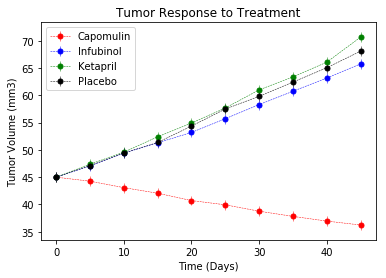

In [8]:
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'], yerr=tumor_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'], yerr=tumor_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'], yerr=tumor_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'], yerr=tumor_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')
plt.show()

## Metastatic Response to Treatment

In [9]:
# Select required columns for analysis
metastatic_response_df = drug_trial_data[['Drug', 'Timepoint', 'Metastatic Sites']]

# Calculate mean of Metastatic Sites per drug
metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

# Calculate standard error for Metastatic Sites
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df['Metastatic Sites'].sem()
metastatic_response_df.reset_index(inplace = True)
metastatic_response_df.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Reshaping the data frame using Pivot Table
metastatic_response_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Reshaping the Volume SEM data frame using Pivot Table
metastatic_response_sem_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Site SEM')  
metastatic_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
5,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
10,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
15,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
20,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
25,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
30,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
35,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
40,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044


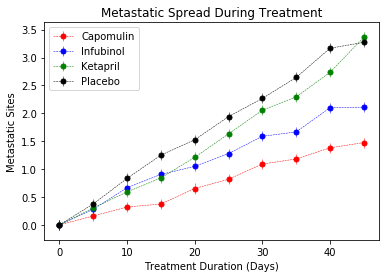

In [14]:
# Create scatter plot to show how number of metastatics sites changes overtime for each treatment
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], yerr=metastatic_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')
plt.show()

## Survival Rates

In [15]:
# Select required columns for analysis
survival_rate_df = drug_trial_data[['Drug', 'Timepoint', 'Mouse ID']]

# Set index to Drug and Timepoint
survival_rate_df = survival_rate_df.set_index(['Drug', 'Timepoint'])
survival_rate_df.head()

Mouse ID
Drug      Timepoint         
Capomulin 0             b128
          5             b128
          10            b128
          15            b128
          20            b128

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Creat a new column Mouse Count
survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Reshaping the data frame using Pivot Table
survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
survival_rate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


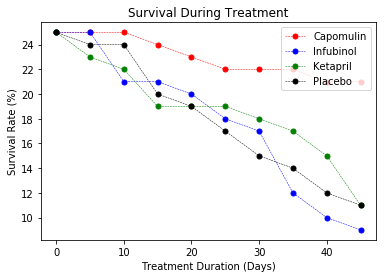

In [17]:
# Create scatter plot to show the survival rate of mice through the course of treatment
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='upper right')
plt.show()

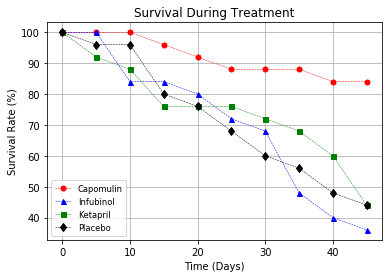

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [18]:
tumor_volume_change_percentage =  ((tumor_response_pivot.iloc[-1]-tumor_response_pivot.iloc[0])/tumor_response_pivot.iloc[0]) * 100
tumor_volume_change_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

NameError: name 'fig' is not defined

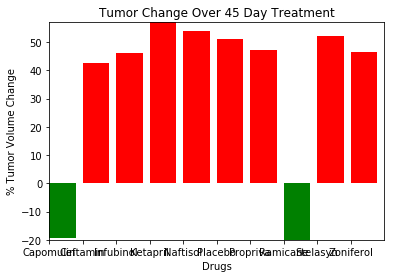

In [20]:
# Store all Relevant Percent Changes into a Tuple

tumor_volume_change_percentage.index
drug = list(tumor_volume_change_percentage.index)
drug
# Splice the data between passing and failing drugs
tumor_percent_change = list(tumor_volume_change_percentage.values)
tumor_percent_change

# Orient widths. Add labels, tick marks, etc. 
colors = ['r' if tpc > 0 else 'g' for tpc in tumor_percent_change]
colors

x_axis = np.arange(len(tumor_percent_change))
x_axis
# colors = [‘g’ if tpc > 0 else ‘r’ for tpc in tumor_percent_change]
plt.bar(x_axis, tumor_percent_change, color = colors, align="edge")
# Create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tumor_volume_change_percentage.index)
plt.xlim(0, len(x_axis))
plt.ylim(-20, max(tumor_volume_change_percentage.values))
# Call functions to implement the function calls
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

# Save the Figure

plt.savefig("% Tumor Volume Change")
# Show the Figure
fig.show()